<a href="https://colab.research.google.com/github/GonxKillua0/Machine-learning/blob/main/Clustering.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
df = pd.read_csv('/content/drive/MyDrive/Colab Notebooks/Toppers Acadmy Data/data/Machine Learning/Chapter 4:- Unsupervised Learning/Day 2 Hierarchical Clustering/Mall_Customers.csv')
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100)
0,1,Male,19,15,39
1,2,Male,21,15,81
2,3,Female,20,16,6
3,4,Female,23,16,77
4,5,Female,31,17,40


In [ ]:
x = df.iloc[:, 3:5].values
x

array([[ 15,  39],
       [ 15,  81],
       [ 16,   6],
       [ 16,  77],
       [ 17,  40],
       [ 17,  76],
       [ 18,   6],
       [ 18,  94],
       [ 19,   3],
       [ 19,  72],
       [ 19,  14],
       [ 19,  99],
       [ 20,  15],
       [ 20,  77],
       [ 20,  13],
       [ 20,  79],
       [ 21,  35],
       [ 21,  66],
       [ 23,  29],
       [ 23,  98],
       [ 24,  35],
       [ 24,  73],
       [ 25,   5],
       [ 25,  73],
       [ 28,  14],
       [ 28,  82],
       [ 28,  32],
       [ 28,  61],
       [ 29,  31],
       [ 29,  87],
       [ 30,   4],
       [ 30,  73],
       [ 33,   4],
       [ 33,  92],
       [ 33,  14],
       [ 33,  81],
       [ 34,  17],
       [ 34,  73],
       [ 37,  26],
       [ 37,  75],
       [ 38,  35],
       [ 38,  92],
       [ 39,  36],
       [ 39,  61],
       [ 39,  28],
       [ 39,  65],
       [ 40,  55],
       [ 40,  47],
       [ 40,  42],
       [ 40,  42],
       [ 42,  52],
       [ 42,  60],
       [ 43,

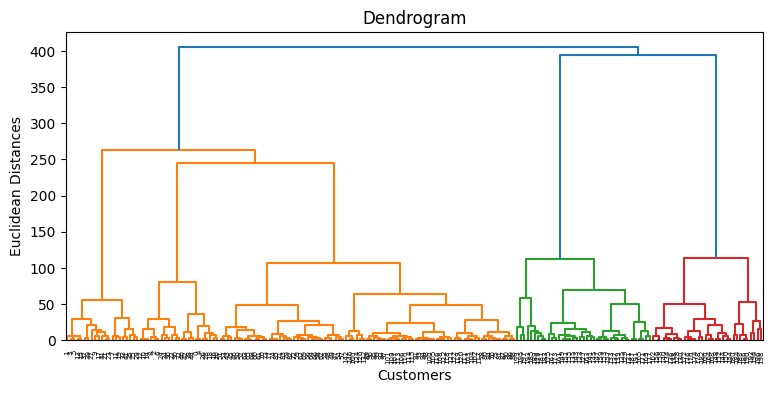

In [ ]:
# Using the dendogram to find the optimal number of clusters
plt.figure(figsize = (9, 4))
import scipy.cluster.hierarchy as sch
dendrogram = sch.dendrogram(sch.linkage(x, method = 'ward'))
plt.title('Dendrogram')
plt.xlabel('Customers')
plt.ylabel('Euclidean Distances')
plt.show()

In [ ]:
from sklearn.cluster import AgglomerativeClustering
from sklearn.cluster import KMeans

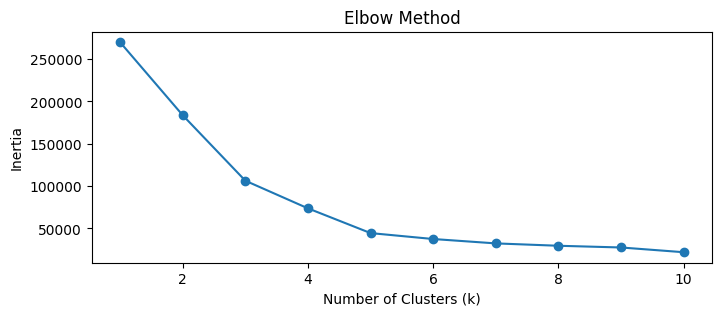

In [ ]:
k_range = range(1, 11)

inertia_values = []

for k in k_range:
    model = KMeans(n_clusters = k)
    model.fit(x)
    inertia_values.append(model.inertia_)

plt.figure(figsize=(8, 3))
plt.plot(k_range, inertia_values, marker='o')
plt.xlabel('Number of Clusters (k)')
plt.ylabel('Inertia')
plt.title('Elbow Method')
plt.show()

### <b> The number of clusters will be the number of vertical lines which are being intersected by the line drawn using the threshold. </b>

### No. of Cluster  = 5

In [ ]:
hc = AgglomerativeClustering(n_clusters = 5,linkage = 'ward')
y_hc = hc.fit_predict(x)

In [ ]:
y_hc

array([4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3,
       4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1,
       4, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 1, 2, 1, 2, 0, 2, 0, 2,
       1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 1, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2,
       0, 2])

In [ ]:
df['aglo_label'] = y_hc
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),aglo_label
0,1,Male,19,15,39,4
1,2,Male,21,15,81,3
2,3,Female,20,16,6,4
3,4,Female,23,16,77,3
4,5,Female,31,17,40,4


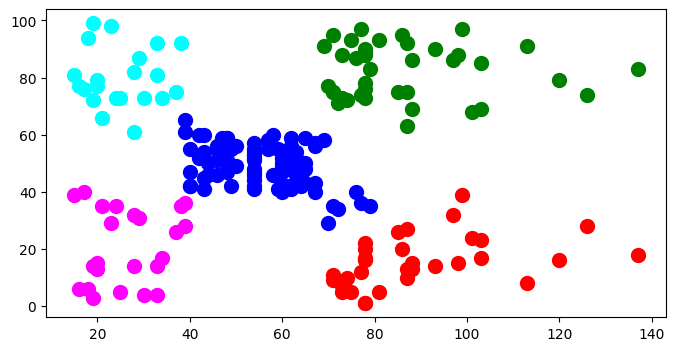

In [ ]:
plt.figure(figsize = (8, 4))
plt.scatter(x[y_hc == 0, 0], x[y_hc == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[y_hc == 1, 0], x[y_hc == 1,1], s = 100, c = 'blue',label = 'Cluster 2')
plt.scatter(x[y_hc == 2, 0], x[y_hc == 2,1], s = 100, c = 'green',label = 'Cluster 3')
plt.scatter(x[y_hc == 3, 0], x[y_hc == 3,1], s = 100, c = 'cyan',label = 'Cluster 4')
plt.scatter(x[y_hc == 4, 0], x[y_hc == 4,1], s = 100, c = 'magenta',label = 'Cluster 5')

### **KMeans Clustring**

In [ ]:
kmeans = KMeans(n_clusters = 5)
y_kmeans = kmeans.fit_predict(x)

In [ ]:
y_kmeans

array([2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0,
       2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 0, 2, 1,
       2, 0, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1,
       1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 4, 3, 4, 1, 4, 3, 4, 3, 4,
       1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 1, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4, 3, 4,
       3, 4], dtype=int32)

In [ ]:
df['kmeans_label'] = y_kmeans
df.head()

,CustomerID,Genre,Age,Annual Income (k$),Spending Score (1-100),aglo_label,kmeans_label
0,1,Male,19,15,39,4,2
1,2,Male,21,15,81,3,0
2,3,Female,20,16,6,4,2
3,4,Female,23,16,77,3,0
4,5,Female,31,17,40,4,2


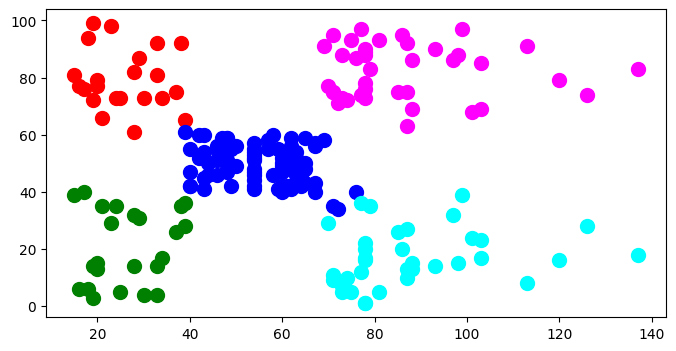

In [ ]:
label = df['kmeans_label']

plt.figure(figsize = (8, 4))
plt.scatter(x[label == 0, 0], x[label == 0, 1], s = 100, c = 'red', label = 'Cluster 1')
plt.scatter(x[label == 1, 0], x[label == 1,1], s = 100, c = 'blue',label = 'Cluster 2')
plt.scatter(x[label == 2, 0], x[label == 2,1], s = 100, c = 'green',label = 'Cluster 3')
plt.scatter(x[label == 3, 0], x[label == 3,1], s = 100, c = 'cyan',label = 'Cluster 4')
plt.scatter(x[label == 4, 0], x[label == 4,1], s = 100, c = 'magenta',label = 'Cluster 5')

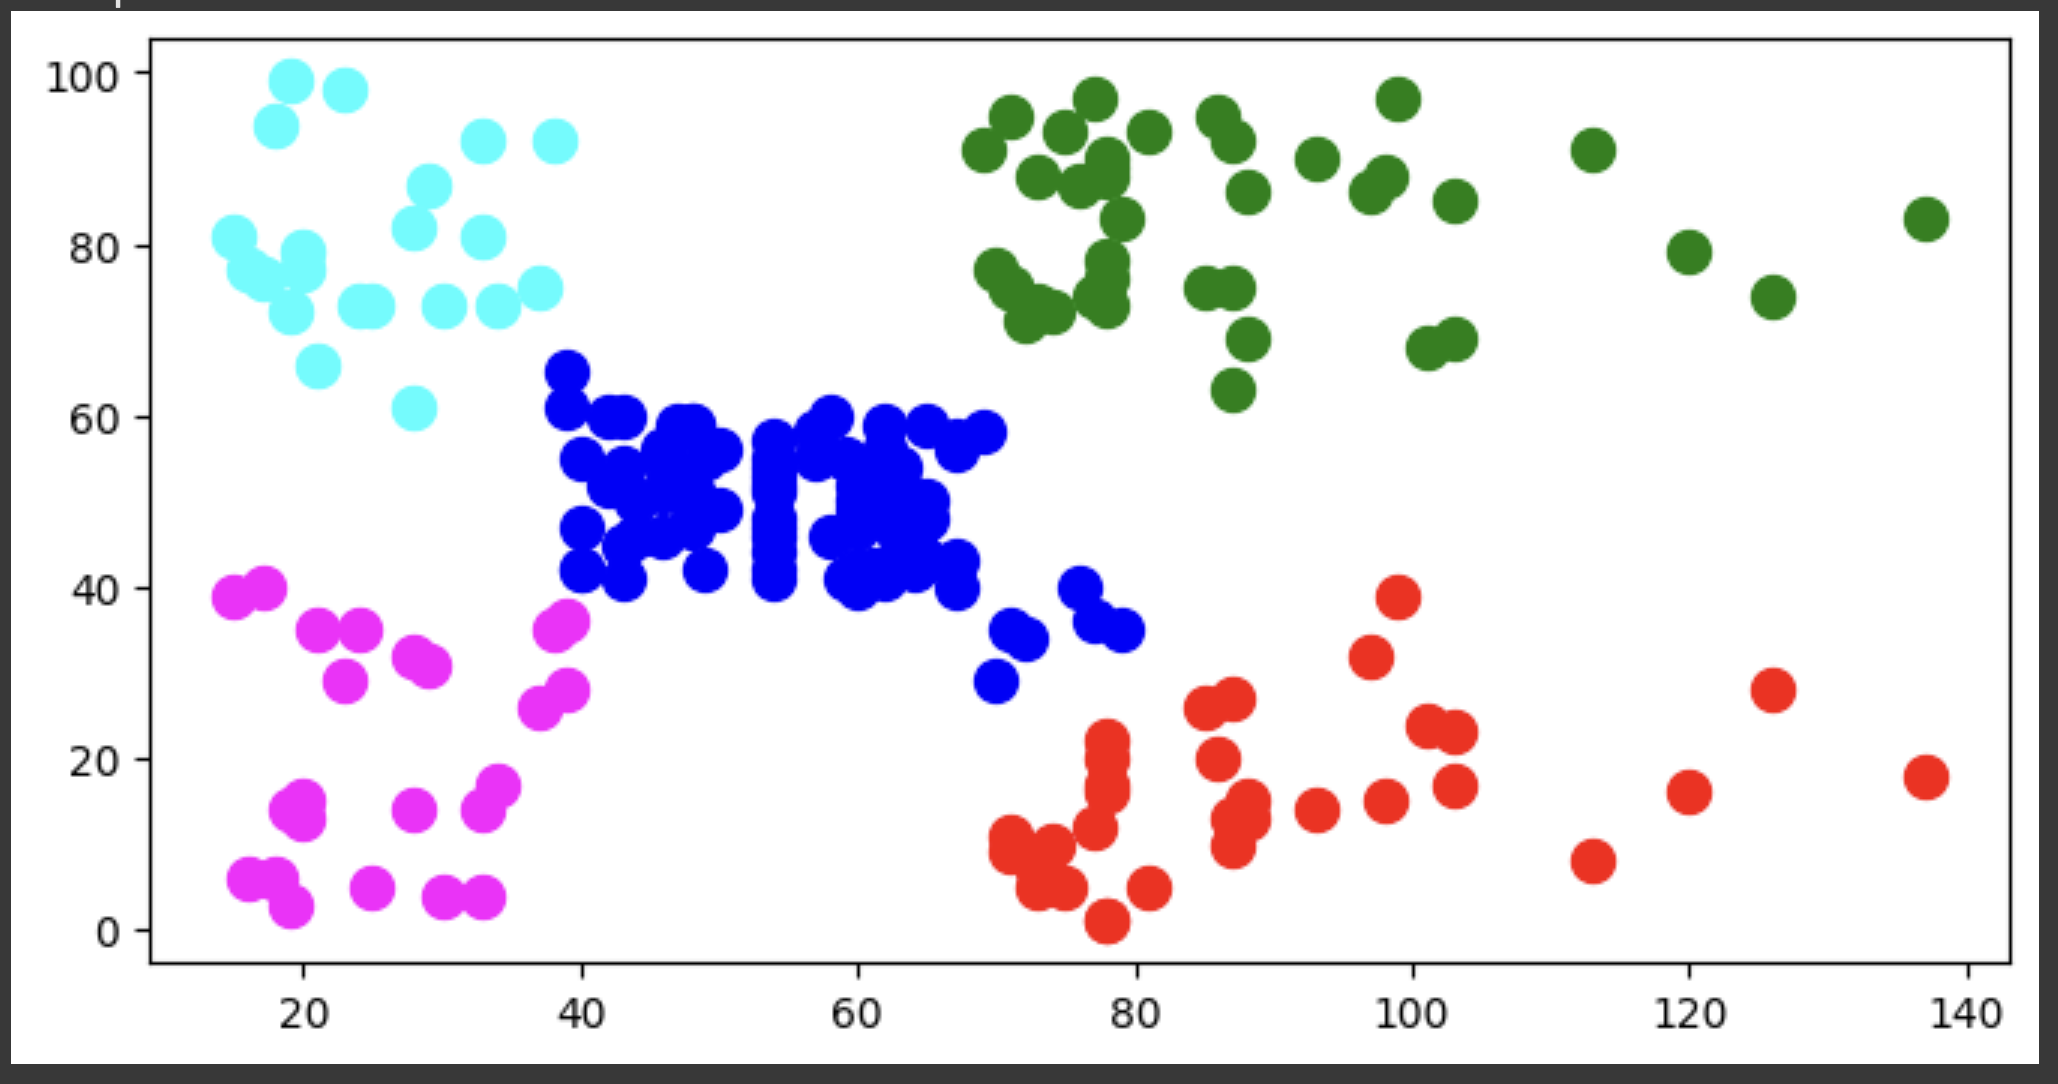

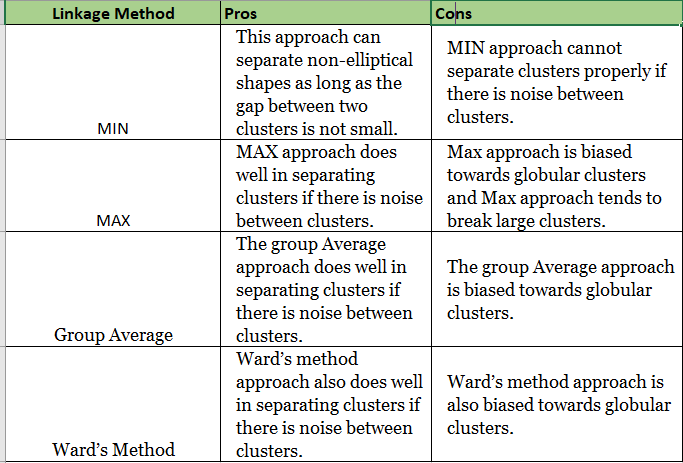



## <b><u>  Kmeans Vs Hierarchical Clustering   </u></b>

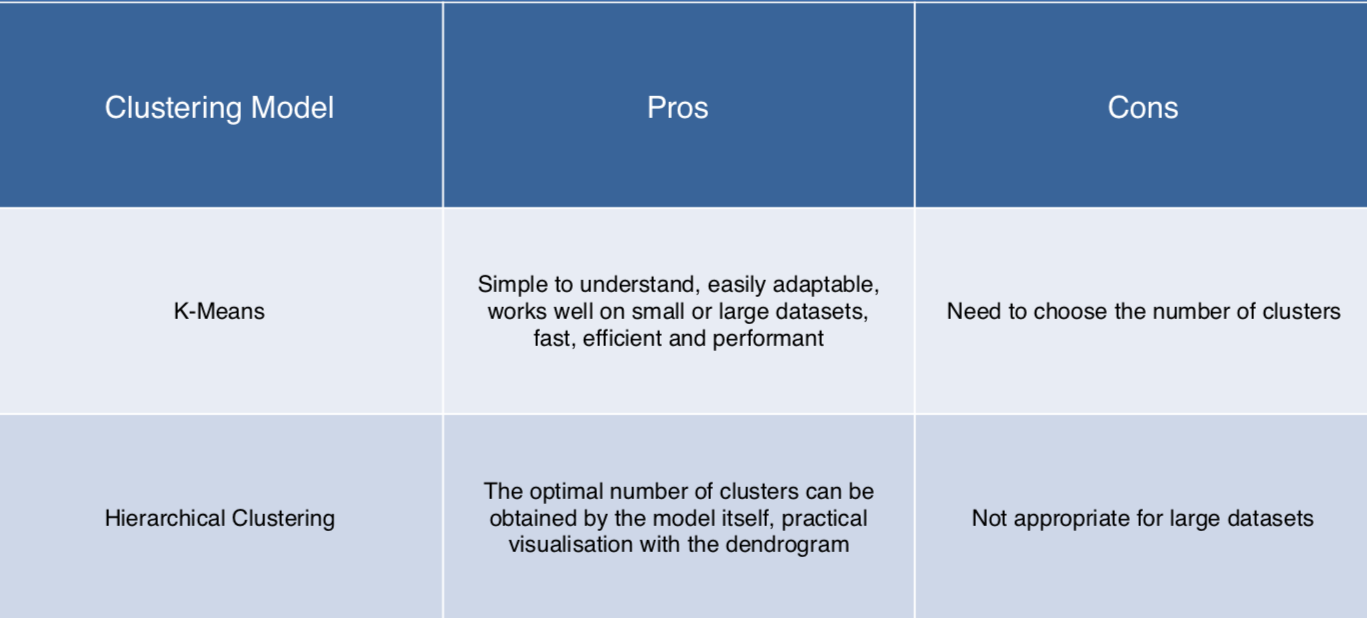